# IndabaX DRC 2023


## Tutoriel: Entrainer TON PREMIER MODELE de machine learning avec Scikit-Learn

## Comment installer scikit-learn?

In [9]:

!pip3 install sklearn

# 1. C'est quoi Scikit-Learn?

C'est just un outil simple et efficace pour l'analyse des données et le **MACHINE LEARNING!!**

## Les advantages de Scikit-Learn

* Acceder aux modèles de machine learning models est juste simple 

* Donne la possibilité de modifier les parametres des modèles 

* Il ya une documentation disponible avec les details de tous les modèles et les  paramètres

* Il y a une active communauté pour le developement et l'assistance.

## Comment Scikit-learn  marche?

Les etapes à suivre sont les suivantes pour tous les modèles:

* **Importer le modèle (Importing the model)**



* **Instancier le modèle (Instantiating the model)**



* **Entrainer le modèle avec les données (Fitting the model with data)**




* **Prédire la sortie (target) pour des nouvelles observations (Predicting the target for a new observation)**

## Importation of dependencies 

Avec Scikit-Learn, tu peux  importer:

* **Les données (datasets)** (par exemples iris dataset, digits, images, cancer dataset)



* **Les modèles de Machine Learning ou les Algorithmes** (Regression Logistique, Regression LIneaire, KNN, SGDC , SVM)



* **Les métriques d'evaluation** (Root Mean Square , accuracy_score, confusion matrix)

Dans les lignes qui suivent nous allons montrer en pratique comment cela se passe.

## 1. Importer les données

Pour cet exemple, nous allons importer les données appelé "boston" qui contient les prix des maisons de boston.

- 506 **observations**
- 13 **features** 
- **Variable Reponse**est MEDV
- **Probleme de regression** parceque la variable reponse (target) est continue.

In [5]:
import pandas as pd ##pour la manipulation des tableaux de donnée
import numpy as np ##pour les operations mathematiques (vecteur, matrices, etc)
import operator
import matplotlib.pyplot as plt ##pour la visualisation 
%matplotlib inline
#importer les données boston à partir du module des données
from sklearn.datasets import load_boston

# sauvegarder les objets contenant les données 'boston' ainsi que ses attributs
boston = load_boston()
# Sauvegarder les attributs en X (c'est une matrice)
X = boston.data
#Sauvegarder la variable y (c'est un vecteur)
y = boston.target



/home/aims/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

## 2. Exploration des données

In [6]:
# Afficher la dimension de X et y.
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [7]:
#Combiner X et Y dans un tableau
df = pd.DataFrame(X , columns = boston.feature_names) 
df["MEDV"] = y
#Afficher les 5 premieres lignes du tableau 
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
#afficher les 5 dernieres lignes du tableau
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


Comme vous pouver le voir, le tableau a 14 colonnes (13 attributs ou features et une variable reponse 'MEDV) 

In [10]:
##on peux afficher aussi 5 observations d'une maniere aléatoire

df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
376,15.28800,0.0,18.10,0.0,0.671,6.649,93.3,1.3449,24.0,666.0,20.2,363.02,23.24,13.9
153,2.14918,0.0,19.58,0.0,0.871,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79,19.4
398,38.35180,0.0,18.10,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0
195,0.01381,80.0,0.46,0.0,0.422,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
389,8.15174,0.0,18.10,0.0,0.700,5.390,98.9,1.7281,24.0,666.0,20.2,396.90,20.85,11.5


In [8]:
#Pour avoir les details de ce que represente ces 13 attributs
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
## Avoir les informations sur le tableau des données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [12]:
## Avoir la liste des noms de colonnes
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [14]:
#Pour afficher le tableau statistique (moyenne, ecart type, etc)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 3. Modelisation

**Etape 1:** Importer la classe du modele à utiliser. Dans notre cas on importe la regression linéaire

In [16]:
from sklearn.linear_model import LinearRegression

**Etape 2:** "Instancier" le "estimateur"

- "Estimateur" en scikit-learn c'est le modele

In [17]:
RegLin = LinearRegression()

- Tu peu nommer to model comme tu veux 
- Ici les paramètres sont definis par santé

In [18]:
print(RegLin)

LinearRegression()


**Etape 3:** Entrainer le modèle avec les données ("model training")

- Modèle apprend et etudie le lien entre X et  y

In [19]:
RegLin.fit(X, y)

LinearRegression()

**Etap 4:** Prédire la variable reponse (target) pour une nouvelle observation

- La nouvelle observations est une observation qui ne fait pas parti de données d'observation
- Elle utilise les informations appris durant l'entrainement du modèle 

In [20]:
#Predire la variable y pour une observation donnée
RegLin.predict([[16,50,19,0,0,7.5,50,1.3, 24,500,20.5,285.1,24]])

array([35.84043898])

- Tu peux prédire pour multiple observations
Notons que lors de la prediction, la nouvelle observation doit avoir le même nombre d'attributs càd comme nous avons entrainé notre tableau de donnée a 13 attributs le nouvelle observation doit avoir 13 entrée à son tour sinon le model ne sera pas en mesure de prédire.

In [22]:
X_nouv = [[16,50,19,0,0,7.5,50,1.3, 24,500,20.5,285.1,24], [13,20,19,0,0,7.5,50,1.3, 24,300,20.5,244.1,20]]
RegLin.predict(X_nouv)

array([35.84043898, 38.95603259])

Dans la première partie, nous avons entrainé le modèle sur toutes les observations sans toute fois diviser. Notons qu'en Machine Learning, il est important d'entrainer le  modèle sur une partie de donnée appelée 'Training data' ou donnée d'entrainement et puis tester sur une partie 'Testing data' donnée de validation. Ceci permet de tester sur les données que le  modèle n'a pas vu durant l'entrainement et aussi de s'assurer que le  modèle est capable de généraliser sur les non-vu.

Souvent la repartition se fais de la sorte, sur les 100% de données, 80% (70%) est utilisé pour l'entrainement et 20%(30%) pour le test. L'image ci-dessous montre exactement comment la repartition se fait. 

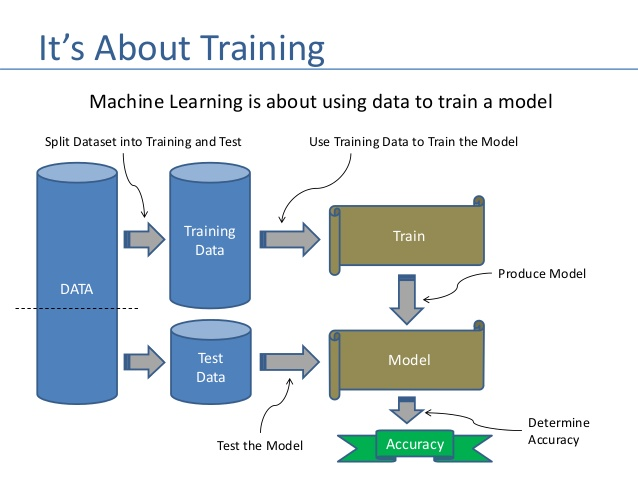

In [24]:
from IPython.display import Image
Image('img/ttsplit.jpg')

C'est avec les données d'evaluation, qu'on peut evaluer la performance (erreur) du modèle (à l'aide d'une metrique) et se dit si le modèle est performant ou pas.

## 4. Repartition des données

In [26]:
## Importer train_test_split dans le module model_selection

from sklearn.model_selection import train_test_split

##Definir de la repartition, 80% de données pour l'entrainement et 20% pour tester

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size =20)

In [27]:
##Afficher la dimension de chaque donnée
print(X_train.shape)
print(X_test.shape)

(486, 13)
(20, 13)


In [29]:
# Instancier le modèle linéaire en utilisant la classe LinearRegression avec les paramètres par defaut
modele = LinearRegression()

# Utiliser la methode fit pour entrainer le model avec les données define pour l'entrainement du modele
modele.fit(X_train,y_train)

# Utiliser le modèle entrainé pour prédire la sortie y_pred à partir des données de test
y_pred = modele.predict(X_test)

y_pred

array([29.19090716, 36.23629488, 13.99215293, 24.67380546, 18.66725887,
       23.133763  , 17.64956513, 13.59063077, 23.25723463, 20.53804758,
       25.15488015, 18.95504651, -5.2393911 , 21.40605822, 19.59280463,
       25.71104617, 20.71945029,  6.2459211 , 40.62413924, 17.54837847])

## 5. Evaluation du modèle
On commence par importer la metrique, pour le cas de la regression, nous utilisons mean_squared_error (erreur quadratique moyen)  

In [30]:
# Importer la métrique  mean_squared_error (erreur quadratique moyen) pour evaluer l'erreur du modèle
from sklearn.metrics import mean_squared_error

# Calculer la performance du modèle i.e l'erreur entre prediction et le y_test en utilisant la metrique mean_squared_error
mse = mean_squared_error(y_test,y_pred)

#Afficher l'errer
print('mse:',mse)

mse: 19.691370337597135


## Conclusion

L'erreur entre les predictions y_pred et les valeurs réelles y_test est de 19.69.  

Il ya d'autres modèles de regression comme XGBoostRegressor, nous allons pas entré en detail mais vous pouvez consulté ce lien https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html


In [31]:
from sklearn import ensemble

In [32]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [34]:
y_predict = reg.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
print("L'erreur (MSE) après le test: {:.4f}".format(mse))


L'erreur (MSE) après le test: 4.0121


En comparant les erreurs pour les deux modeles, nous pouvons dire que Gradient boosting est meilleur que linear regression sur ce type de donnée

Elaboré par: Berthine Nyunga
Prière de nous contacter au cas où vous avez des questions.

Email: bertheny2@gmail.com

Abonnez-vous à notre page Twitter: **@IndabaxDrc** et notre page Facebook: **@IndabaX DRC**

Partager votre experience avec IndabaX Drc2023 en nous identifiant sur Twitter **@IndabaxDrc** et sur facebook  **@IndabaX DRC**

Merci pour votre participation.
